# Example 2
Usage using an image and reference with an ROI. This can help approximating the noise 

Until the repo is made public you'll be required to enter a git token. This can be created by going to [GitHub](https://docs.github.com/en/github/authenticating-to-github/creating-a-personal-access-token) and only ticking the repo. Do not share this key. 

In [1]:
from getpass import getpass
TOKEN = getpass('Enter the git token: ')

KeyboardInterrupt: Interrupted by user

Clone and install repo locally and download the example data if you have not already done this in the current working directory.

In [ ]:
!git clone https://$TOKEN@github.com/rg314/pytraction.git
!pip install pytraction/

In [ ]:
!pytraction_get_data

In [2]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

from pytraction import TractionForceConfig
from pytraction import plot, prcoess_stack

In [3]:
pix_per_um = 9.8138
E = 1000 # Young's modulus in Pa

img_path = '../data/example2/1kPa-2-Position006.tif'
ref_path = '../data/example2/1kPa-2-Position006_ref.tif'
roi_path = '../data/example2/1kPa-2-Position006.roi'

This time we are going to load in a ```.roi``` file from ImageJ. It is also possible to use a ```.csv``` with headers `x` and `y`. We can load in the `roi` by passing the `roi_path` the `load_data` method. It is also possible to have a ```.zip``` file that contains a series of `roi` files. Note that the number of `roi` files must match the number of frames in the image stack.

In [8]:
traction_config = TractionForceConfig(pix_per_um, E=E)
img, ref, roi = traction_config.load_data(img_path, ref_path, roi_path)

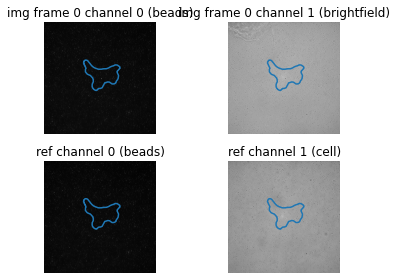

In [9]:
x, y = roi # get x and y from ROI

fig, ax = plt.subplots(2,2)
ax[0,0].set_title('img frame 0 channel 0 (beads)')
ax[0,0].imshow(img[0,0,:,:], cmap='gray')
ax[0,0].plot(x,y)
ax[0,0].set_axis_off()

ax[0,1].set_title('img frame 0 channel 1 (brightfield)')
ax[0,1].imshow(img[0,1,:,:], cmap='gray')
ax[0,1].plot(x,y)
ax[0,1].set_axis_off()

ax[1,0].set_title('ref channel 0 (beads)')
ax[1,0].imshow(ref[0,:,:], cmap='gray')
ax[1,0].plot(x,y)
ax[1,0].set_axis_off()

ax[1,1].set_title('ref channel 1 (cell)')
ax[1,1].imshow(ref[1,:,:], cmap='gray')
ax[1,1].plot(x,y)
ax[1,1].set_axis_off()

plt.tight_layout()

We can now process the stack to get the TFM results. The only difference between the previous example is that now we can pass the `roi` parameter into `process_stack`.

We can see that the ROI is much smaller than the whole image. Therefore, we can use the crop function to get crop in input image to speed up processing time.

In [10]:
log2 = process_stack(img, ref, traction_config, roi=roi, verbose=0, crop=True)

Processing stacks


/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/optimize/optimize.py:1971: ComplexWarning: Casting complex values to real discards the imaginary part
  print("%5.0f   %12.6g %12.6g %s" % (fmin_data + (step,)))
/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/optimize/optimize.py:2015: ComplexWarning: Casting complex values to real discards the imaginary part
  print("%5.0f   %12.6g %12.6g %s" % (fmin_data + (step,)))
/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-pa

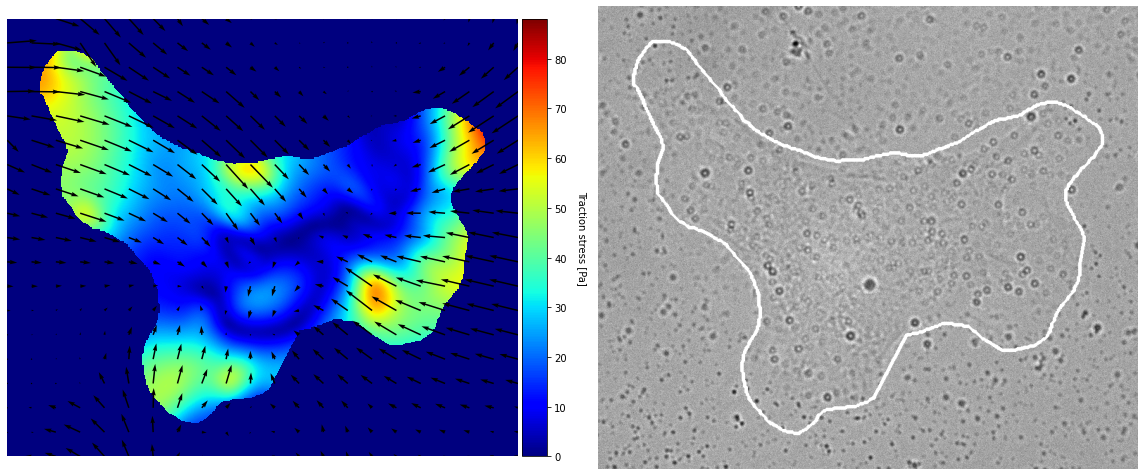

In [20]:
for frame in range(len(log2)):
    plot(log2, frame=frame, mask=True)